In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.8.2


In [2]:
#Loading and reshaping data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [3]:
#Adding label names to a list
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Checking the datatypes and training data
print(type(fashion_mnist))
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'module'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Checking the size and dimension of the ndarrays
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
# Each array has a size of 28*28. Train section has 60000 arrays and test section has 10000 arrays  

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


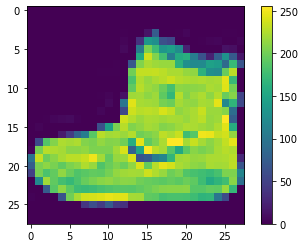

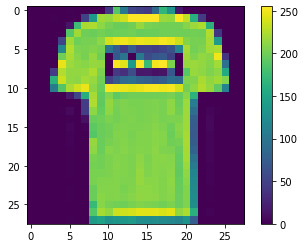

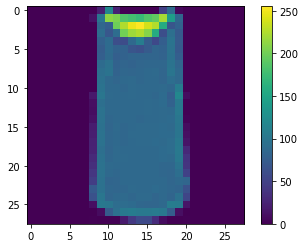

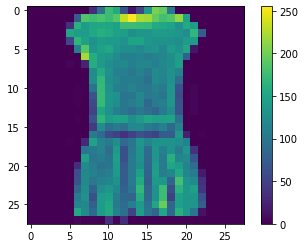

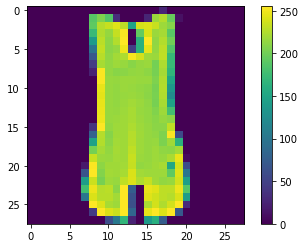

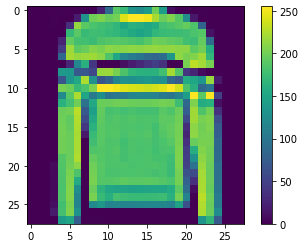

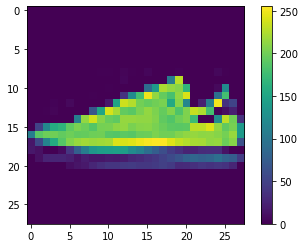

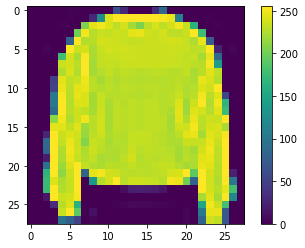

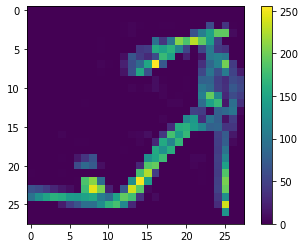

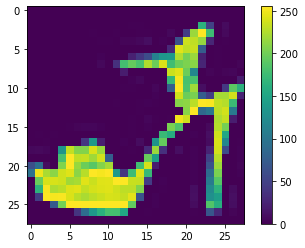

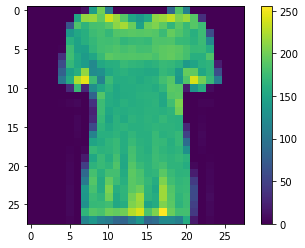

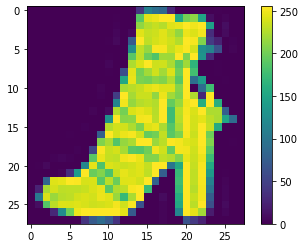

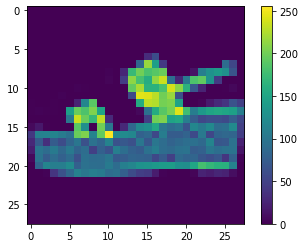

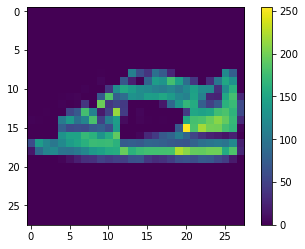

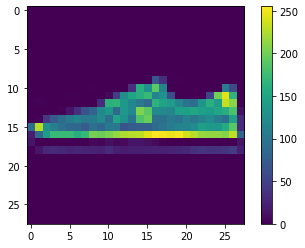

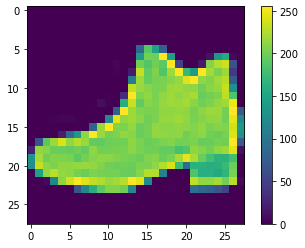

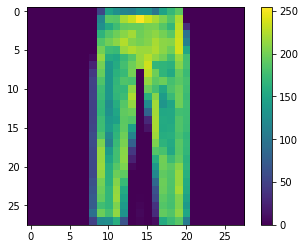

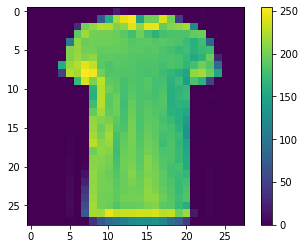

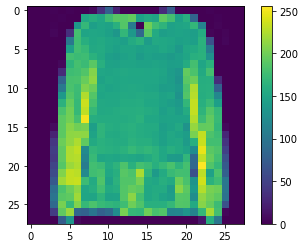

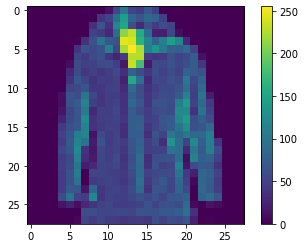

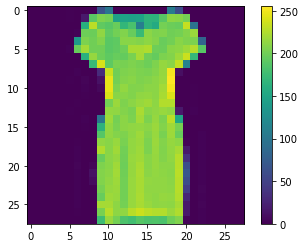

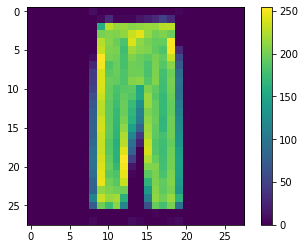

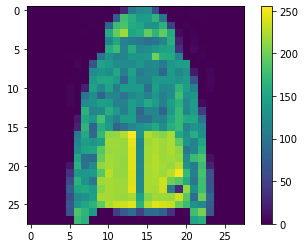

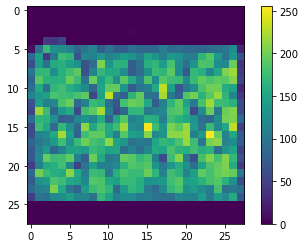

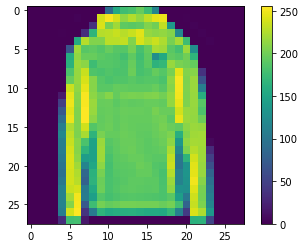

In [6]:
#Checking sample training data
for i in range(25) :
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [7]:
# Normalizing the data for better accuracy
train_images = train_images / 255.0
test_images = test_images / 255.0

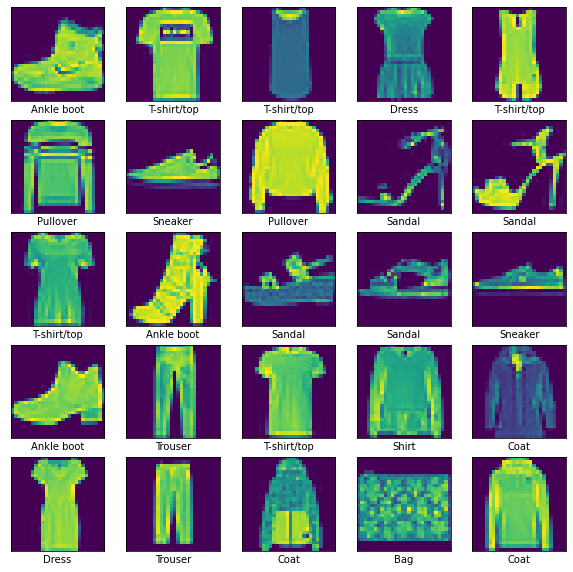

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
# Designing the cnn model
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='swish', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='swish', kernel_initializer='he_uniform'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='swish', kernel_initializer='he_uniform'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='swish', kernel_initializer='he_uniform'))
cnn.add(layers.Dense(128, activation='swish', kernel_initializer='he_uniform'))
cnn.add(layers.Dense(10))

In [28]:
#Compiling the cnn model
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
#Training
cnn.fit(train_images, train_labels, epochs=10, use_multiprocessing= False)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4191 - accuracy: 0.8434
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2822 - accuracy: 0.8948
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2343 - accuracy: 0.9119
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2021 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1716 - accuracy: 0.9355
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1497 - accuracy: 0.9430
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1283 - accuracy: 0.9510
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1085 - accuracy: 0.9590
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0952 - accuracy: 0.9640
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [30]:
#Testing
test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3629 - accuracy: 0.9070 - 804ms/epoch - 3ms/step

Test accuracy: 0.9070000052452087


In [31]:
probability_cnn = tf.keras.Sequential([cnn, 
                                         tf.keras.layers.Softmax()])

In [32]:
predictions = probability_cnn.predict(test_images)

In [33]:
predictions[0]

array([6.1709994e-18, 2.9091750e-18, 1.9206050e-17, 8.5620871e-20,
       2.6588304e-11, 2.1572603e-11, 1.8213687e-19, 5.0109256e-10,
       1.9810254e-19, 1.0000000e+00], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

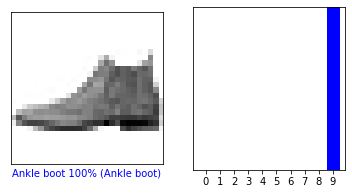

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

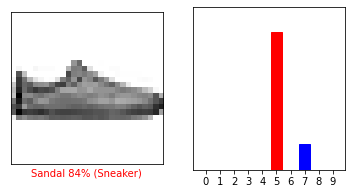

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


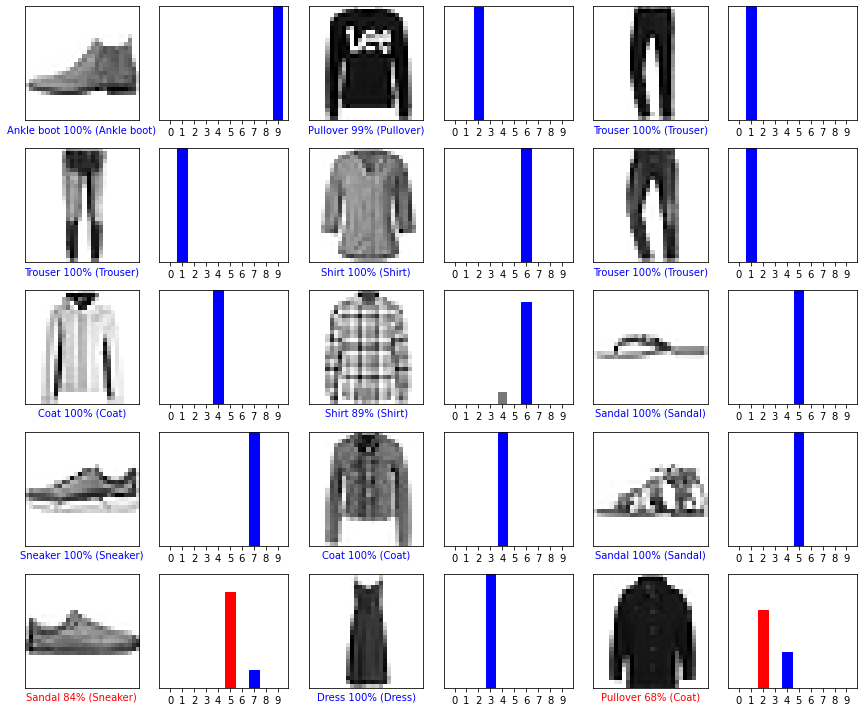

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()